<a href="https://colab.research.google.com/github/AnanthSeetharaman/DataIngestionFrmwrkUsingADF/blob/master/RAG_Tutorial_4_OD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.3/469.3 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.2 which is incompatible.


In [2]:
!apt-get update
!apt-get install -y postgresql-14-pgvector

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:5 https://cli.github.com/packages stable InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,847 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,594 kB]
Get:14 http:

In [3]:
%%sh
apt-get -qq install postgresql-server-dev-14

cd /tmp
rm -rf pgvector


git clone --branch v0.8.1 https://github.com/pgvector/pgvector.git

cd pgvector

make

make install # may need sudo




Preconfiguring packages ...
(Reading database ... 125079 files and directories currently installed.)
Preparing to unpack .../libc6-dev_2.35-0ubuntu3.11_amd64.deb ...
Unpacking libc6-dev:amd64 (2.35-0ubuntu3.11) over (2.35-0ubuntu3.8) ...
Preparing to unpack .../libc-dev-bin_2.35-0ubuntu3.11_amd64.deb ...
Unpacking libc-dev-bin (2.35-0ubuntu3.11) over (2.35-0ubuntu3.8) ...
Preparing to unpack .../libc6_2.35-0ubuntu3.11_amd64.deb ...
Unpacking libc6:amd64 (2.35-0ubuntu3.11) over (2.35-0ubuntu3.8) ...
Setting up libc6:amd64 (2.35-0ubuntu3.11) ...
Selecting previously unselected package logrotate.
(Reading database ... 125079 files and directories currently installed.)
Preparing to unpack .../00-logrotate_3.19.0-1ubuntu1.1_amd64.deb ...
Unpacking logrotate (3.19.0-1ubuntu1.1) ...
Selecting previously unselected package netbase.
Preparing to unpack .../01-netbase_6.3_all.deb ...
Unpacking netbase (6.3) ...
Selecting previously unselected package python3-yaml.
Preparing to unpack .../02-pyth

Cloning into 'pgvector'...
Note: switching to '778dacf20c07caf904557a88705142631818d8cb'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [4]:
# Install PostgreSQL
!apt-get update
!apt-get install -y postgresql postgresql-contrib

# Start PostgreSQL service
!service postgresql start

# Create a new user and database
import getpass
import os

user = "pwed"
password = getpass.getpass("Enter password for new PostgreSQL user '{}': ".format(user))
# Set the password as an environment variable for the psql command
os.environ['PGPASSWORD'] = password

# Create user and database using psql
!sudo -u postgres psql -c "CREATE USER {user} WITH PASSWORD '{password}';"
!sudo -u postgres psql -c "CREATE DATABASE test_db OWNER {user};"


# Test the connection
import psycopg2

try:
    conn = psycopg2.connect(dbname="test_db", user=user, password=password, host="localhost")
    print("Connection to PostgreSQL successful!")
    conn.close()
except psycopg2.OperationalError as e:
    print(f"Error connecting to PostgreSQL: {e}")

# Unset the password environment variable
del os.environ['PGPASSWORD']

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [5]:
%%sh

pg_ctlcluster 14 main start
sudo -u postgres psql -c "select version();"



Cluster is already running.
                                                                 version                                                                  
------------------------------------------------------------------------------------------------------------------------------------------
 PostgreSQL 14.19 (Ubuntu 14.19-0ubuntu0.22.04.1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 11.4.0-1ubuntu1~22.04.2) 11.4.0, 64-bit
(1 row)



In [6]:
!sudo -u postgres psql -d test_db -c "GRANT USAGE ON SCHEMA public TO pwed;"

!sudo -u postgres psql -d test_db -c "CREATE EXTENSION IF NOT EXISTS vector;"
!sudo -u postgres psql -d test_db -c "GRANT USAGE ON SCHEMA public TO pwed;"


GRANT
CREATE EXTENSION
GRANT


In [7]:
!sudo -u postgres psql -d test_db -c "CREATE EXTENSION IF NOT EXISTS vector;"


NOTICE:  extension "vector" already exists, skipping
CREATE EXTENSION


In [8]:
import psycopg2

user = "pwed"
password = getpass.getpass("Enter password for PostgreSQL user '{}': ".format(user))
db_name = "test_db"
host = "localhost"

try:
    conn = psycopg2.connect(dbname=db_name, user=user, password=password, host=host)
    conn.set_session(autocommit=True)
    print("Connection to PostgreSQL successful!")

    # Install pgvector extension
    with conn.cursor() as cur:
        cur.execute("CREATE EXTENSION IF NOT EXISTS vector;")
        print("pgvector extension created.")

    # Verify extension installation
    with conn.cursor() as cur:
        cur.execute("SELECT * FROM pg_extension WHERE extname = 'vector';")
        extension_status = cur.fetchone()
        if extension_status:
            print("pgvector extension is installed and active.")
        else:
            print("pgvector extension not found.")

    conn.close()

except psycopg2.OperationalError as e:
    print(f"Error connecting to PostgreSQL or executing commands: {e}")

Enter password for PostgreSQL user 'pwed': ··········
Connection to PostgreSQL successful!
pgvector extension created.
pgvector extension is installed and active.


In [13]:
# import psycopg2
# import psycopg2, numpy as np

# user = "pwed"
# password = getpass.getpass("Enter password for PostgreSQL user '{}': ".format(user))
# db_name = "test_db"
# host = "localhost"

# try:
#     conn = psycopg2.connect(dbname=db_name, user=user, password=password, host=host)
#     conn.set_session(autocommit=True)
#     print("Connection to PostgreSQL successful!")

#     # Install pgvector extension
#     with conn.cursor() as cur:
#         cur.execute("CREATE EXTENSION IF NOT EXISTS vector;")

#         cur.execute("create table if not exists docs_temp(id serial primary key, content text, embedding vector(3));")
#         cur.execute("truncate table docs;")
#         cur.execute("insert into docs_temp(content,embedding) values (%s,%s),(%s,%s),(%s,%s)",
#                     ('cat','[0.1,0.2,0.3]',
#                      'dog','[0.11,0.19,0.29]',
#                      'car','[0.9,0.8,0.7]'))

#         q=np.array([0.1,0.21,0.31])
#         cur.execute("select content, embedding <-> %s d from docs_temp order by d limit 1;",(f"[{q[0]},{q[1]},{q[2]}]",))
#         print(cur.fetchall())
#         cur.close();

#     conn.close()

# except psycopg2.OperationalError as e:
#     print(f"Error connecting to PostgreSQL or executing commands: {e}")

Core Semantic Work !!


In [14]:
%%bash
pip install sentence_transformers psycopg2-binary > /dev/null


In [15]:
import numpy as np
import pandas as pd
import requests
from os import mkdir, getcwd, chdir, listdir
from os.path import join
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
import pkg_resources
from matplotlib import pyplot as plt
from zipfile import ZipFile
from textwrap import wrap

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/tmp/ipython-input-3291340494.py:9: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [16]:
HOME = getcwd()

In [17]:
if 'catalogue' not in listdir():
    mkdir('catalogue')

if 'test.csv' not in listdir(join(HOME,'catalogue')):
    URL = "https://github.com/fabio-a-oliveira/semantic-search/blob/main/data/project_gutenberg_corpus___2021_05_01.csv?raw=true"
    URL = "https://github.com/pinecone-io/semantic-search-example/raw/refs/heads/main/test.csv"
    content = requests.get(URL).content
    with open(join(HOME,'catalogue','test.csv'), 'wb') as file:
        file.write(content)

catalogue = pd.read_csv(join(HOME, 'catalogue', 'test.csv'),
                        sep = ",")

In [18]:
catalogue

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
99994,99994,What is the most overrated pleasure? Why?,What is the most pleasurable job in the world?
99995,99995,Which is the best open source tool to manage a...,Which tool to manage a Mass Open Online Course...
99996,99996,What could be the stomach between I don't and ...,"What's the difference good ™, ® and ©?"
99997,99997,Does the Facebook Public Feed API include the ...,Is there an API or data feed to find people's ...


In [19]:
import pandas as pd

df=pd.DataFrame({
"id":range(1,11),
"text":[
"How do I learn Python quickly?",
"What is the healthiest breakfast?",
"How to improve memory?",
"Best way to start investing?",
"What is machine learning?",
"How to build muscle efficiently?",
"Tips for saving money on travel?",
"What are antioxidants in food?",
"How to fix slow laptop performance?",
"Best books to learn data science?"
]
})
df.to_csv("/content/catalogue/qa.csv",index=False)
df


,id,text
0,1,How do I learn Python quickly?
1,2,What is the healthiest breakfast?
2,3,How to improve memory?
3,4,Best way to start investing?
4,5,What is machine learning?
5,6,How to build muscle efficiently?
6,7,Tips for saving money on travel?
7,8,What are antioxidants in food?
8,9,How to fix slow laptop performance?
9,10,Best books to learn data science?


In [20]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import psycopg2, getpass, numpy as np

df=pd.read_csv("/content/catalogue/qa.csv")
m=SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
E=m.encode(df["text"].tolist()).astype(float)

u=input()
p=getpass.getpass()
c=psycopg2.connect(dbname="test_db",user=u,password=p,host="localhost")
c.set_session(autocommit=True)
cur=c.cursor()

cur.execute("drop table if exists docs;")
dim=E.shape[1]
cur.execute(f"create table docs(id serial primary key,content text,embedding vector({dim}));")

for t,e in zip(df["text"],E):
    cur.execute("insert into docs(content,embedding) values (%s,%s)",(t,[float(x) for x in e]))

cur.close(); c.close()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

pwed
··········


In [21]:
from sentence_transformers import SentenceTransformer
import psycopg2, getpass
import numpy as np

q="best way to invest money"
m=SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
v=m.encode([q])[0]
u=input("pwed"); p=getpass.getpass("root")
c=psycopg2.connect(dbname="test_db",user=u,password=p,host="localhost")
cur=c.cursor()
# cur.execute("select content,embedding <-> %s d from docs order by d limit 3;",([float(x) for x in v],))

cur.execute(
    "select content, embedding <-> %s::vector d from docs order by d limit 3;",
    ("["+",".join(str(float(x)) for x in v)+"]",)
)


print(cur.fetchall())
cur.close(); c.close()


pwedpwed
root··········
[('Best way to start investing?', 0.6340446250806231), ('Tips for saving money on travel?', 0.935391216030968), ('How to improve memory?', 1.2524197998562707)]


Outcome: semantic ANN then cross-encoder rerank.

In [22]:
from sentence_transformers import SentenceTransformer, CrossEncoder
import psycopg2, getpass, numpy as np

q="best way to invest money"
bi=SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
ve=bi.encode([q])[0]
vals=[float(x) for x in ve]
lit="["+",".join(str(x) for x in vals)+"]"

u=input(); p=getpass.getpass()
c=psycopg2.connect(dbname="test_db",user=u,password=p,host="localhost")
cur=c.cursor()
cur.execute(
    "select content, embedding <-> %s::vector d from docs order by d limit 5;",
    (lit,)
)
cands=cur.fetchall()
cur.close(); c.close()

ce=CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")
pairs=[[q,txt] for (txt,dist) in cands]
scores=ce.predict(pairs)
res=sorted(zip(scores,[txt for txt,_ in cands]),key=lambda x:-x[0])
print(res)


pwed
··········


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

[(np.float32(4.2468348), 'Best way to start investing?'), (np.float32(-10.496731), 'Tips for saving money on travel?'), (np.float32(-11.315397), 'How to improve memory?'), (np.float32(-11.329163), 'How to build muscle efficiently?'), (np.float32(-11.356043), 'How do I learn Python quickly?')]


In [23]:
extra=[
"Random sentence about cooking rice",
"Weather forecast in Australia",
"Instructions to repair a bicycle",
"Guide to meditation techniques",
"History of the Roman Empire",
"How to migrate a Postgres database?",
"Top programming languages in 2025",
"Which stocks should a beginner avoid?",
"Difference between ETF and mutual fund"
]

df2=pd.DataFrame({"id":range(100,100+len(extra)),"text":extra})
df2.to_csv("/content/catalogue/qa2.csv",index=False)


In [24]:
m=SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
E=m.encode(df2["text"].tolist()).astype(float)

u="pwed"; p="root"
c=psycopg2.connect(dbname="test_db",user=u,password=p,host="localhost")
c.set_session(autocommit=True)
cur=c.cursor()
for t,e in zip(df2["text"],E):
    cur.execute("insert into docs(content,embedding) values (%s,%s)",(t,[float(x) for x in e]))
cur.close(); c.close()


Expected change:
ANN returns semantically close but possibly wrong order.
Cross-encoder should pull finance-related rows up and push random sentences down.

Principle:
Bi-encoder = fast, approximate
Cross-encoder = slow, precise refinement

Small clean datasets rarely show separation.
Inject distractors to see reranker value.

In [25]:
q="best way to invest money"
bi=SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
ve=bi.encode([q])[0]
vals=[float(x) for x in ve]
lit="["+",".join(str(x) for x in vals)+"]"

u="pwed"; p="root"
c=psycopg2.connect(dbname="test_db",user=u,password=p,host="localhost")
cur=c.cursor()
cur.execute("select content,embedding <-> %s::vector d from docs order by d limit 5;",(lit,))
cands=cur.fetchall()
cur.close(); c.close()

print("ANN:",cands)

from sentence_transformers import CrossEncoder
ce=CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")
pairs=[[q,txt] for (txt,_) in cands]
scores=ce.predict(pairs)
res=sorted(zip(scores,[txt for txt,_ in cands]),key=lambda x:-x[0])
print("Reranked:",res)


ANN: [('Best way to start investing?', 0.6340446250806231), ('Tips for saving money on travel?', 0.935391216030968), ('Which stocks should a beginner avoid?', 1.006861274763029), ('Difference between ETF and mutual fund', 1.1898787915986606), ('How to improve memory?', 1.2524197998562707)]
Reranked: [(np.float32(4.2468357), 'Best way to start investing?'), (np.float32(-10.496731), 'Tips for saving money on travel?'), (np.float32(-11.090556), 'Difference between ETF and mutual fund'), (np.float32(-11.095617), 'Which stocks should a beginner avoid?'), (np.float32(-11.315397), 'How to improve memory?')]


Scatter Plot


In [26]:
def parse(v):
    s=v.strip()[1:-1].split(",")
    return [float(x) for x in s]



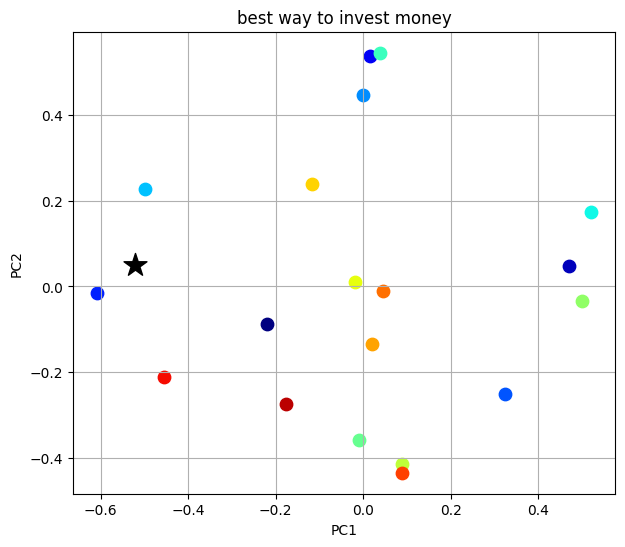

In [27]:
import psycopg2, getpass, numpy as np, pandas as pd
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt, matplotlib as mpl

u="pwed"; p="root"
c=psycopg2.connect(dbname="test_db",user=u,password=p,host="localhost")
cur=c.cursor()
cur.execute("select content, embedding from docs;")
rows=cur.fetchall()
cur.close(); c.close()

texts=[r[0] for r in rows]
embs=np.array([parse(r[1]) for r in rows])


pca=PCA(n_components=2).fit(embs)
pts=pca.transform(embs)

q="best way to invest money"
bi=SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
qv=bi.encode([q])[0]
qp=pca.transform(qv.reshape(1,-1))[0]

plt.figure(figsize=(7,6))
plt.grid()
cmap=mpl.colormaps["jet"]
for i,(x,y) in enumerate(pts):
    plt.scatter(x,y,c=[cmap(i/len(pts))],s=80)

plt.scatter(qp[0],qp[1],c="k",marker="*",s=300)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(q)
plt.show()


Matplotlib has no native hover labels. You saw nothing because we used plt.scatter without interactivity. Use Plotly in one cell.

In [28]:
!pip install plotly > /dev/null


In [29]:
import psycopg2, numpy as np, pandas as pd
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import plotly.express as px

u="pwed"; p="root"
c=psycopg2.connect(dbname="test_db",user=u,password=p,host="localhost")
cur=c.cursor()
cur.execute("select content, embedding from docs;")
rows=cur.fetchall()
cur.close(); c.close()

def parse(v):
    s=v.strip()[1:-1].split(",")
    return [float(x) for x in s]

texts=[r[0] for r in rows]
embs=np.array([parse(r[1]) for r in rows])

pca=PCA(n_components=2).fit(embs)
pts=pca.transform(embs)

q="best way to invest money"
m=SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
qv=m.encode([q])[0]
qp=pca.transform(qv.reshape(1,-1))[0]

df=pd.DataFrame({"text":texts,"x":pts[:,0],"y":pts[:,1]})
qdf=pd.DataFrame({"text":["QUERY"],"x":[qp[0]],"y":[qp[1]]})

fig=px.scatter(df,x="x",y="y",hover_name="text")
fig.add_scatter(x=qdf["x"],y=qdf["y"],mode="markers",marker=dict(size=20,symbol="star"),name="query")
fig.update_layout(title=q)
fig.show()
